<a href="https://colab.research.google.com/github/mutturajiu/BA05-TRIM02-Module-04-Text-Analytics-/blob/master/MMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('Sales_Media_Data.csv')
df.head()

,Row Labels,TV Advertising,Direct Marketing,Sales,Print Advertisting,Internet Advertising
0,1,121112.4186,163745.71270,1128402.774,105474.03250,97041.66108
1,2,198789.5751,129428.12160,1371147.126,103396.69980,99287.29928
2,3,121297.4609,226425.15270,1190517.431,114495.11360,99582.89397
3,4,239749.7354,69180.00983,1282314.930,99088.21362,101187.02630


In [17]:
#remove extra 'Unnamed' column
df_clean = df.loc[:, ~df.columns.str.contains('^Row Labels')]
df_clean.head()

,TV Advertising,Direct Marketing,Sales,Print Advertisting,Internet Advertising
0,121112.4186,163745.71270,1128402.774,105474.03250,97041.66108
1,198789.5751,129428.12160,1371147.126,103396.69980,99287.29928
2,121297.4609,226425.15270,1190517.431,114495.11360,99582.89397
3,239749.7354,69180.00983,1282314.930,99088.21362,101187.02630


In [18]:
#Data Description 

df_clean.describe()

,TV Advertising,Direct Marketing,Sales,Print Advertisting,Internet Advertising
count,4.000000,4.000000,4.000000e+00,4.000000,4.000000
mean,170237.297500,147194.749207,1.243096e+06,105613.514880,99274.720158
std,59035.506018,65709.826375,1.062297e+05,6490.918702,1706.711942
min,121112.418600,69180.009830,1.128403e+06,99088.213620,97041.661080
25%,121251.200325,114366.093657,1.174989e+06,102319.578255,98725.889730
50%,160043.518000,146586.917150,1.236416e+06,104435.366150,99435.096625
75%,209029.615175,179415.572700,1.304523e+06,107729.302775,99983.927053
max,239749.735400,226425.152700,1.371147e+06,114495.113600,101187.026300


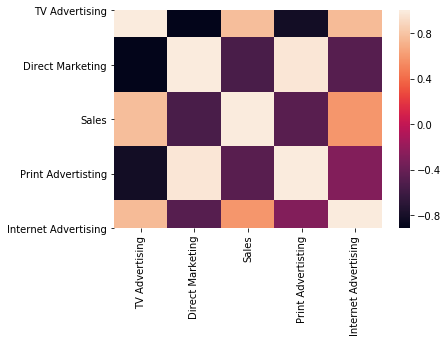

In [19]:
#Correlation b/w variables
corr = df_clean.corr()
sns.heatmap(corr)

In [0]:
#Labels and features
labels = df_clean['Sales']
features = df_clean.drop(['Sales'], axis=1)

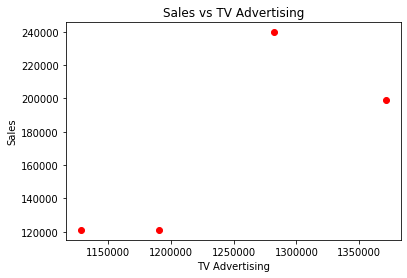

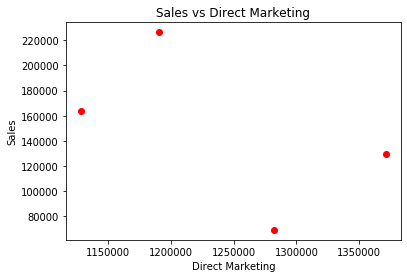

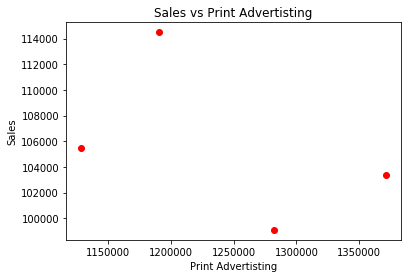

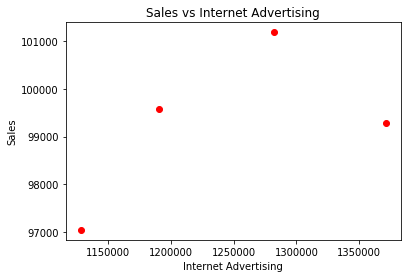

In [23]:
# Scatter graph b/w response and features
for x in features:
    plt.plot(labels, features[x], 'ro')  # arguments are passed to np.histogram
    plt.title("Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("Sales")
    plt.show()

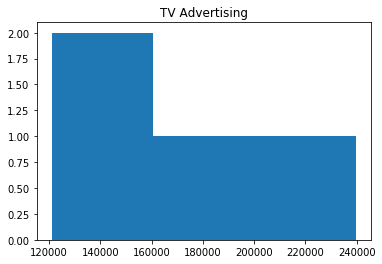

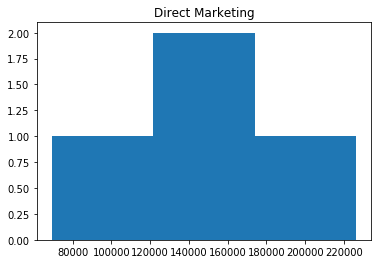

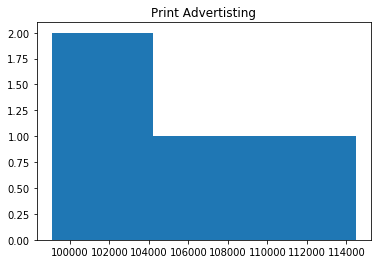

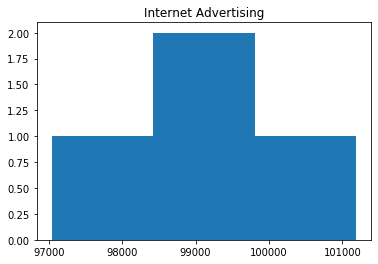

In [24]:
#Data Distribultion 
for x in features:
    plt.hist(features[x], bins='auto')  # arguments are passed to np.histogram
    plt.title(x)
    plt.show()

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1974: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1975: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


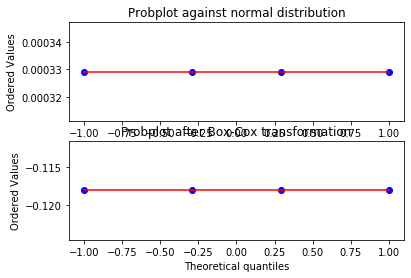

In [33]:
#As from the above histogram graph, the data distribution for the newspaper is skrew towards left.
#Lets correct it using Box Cox which helps in removing the data skrewness.

from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df_clean['TV Advertising']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)
df_clean['TV Advertising'], _ = stats.boxcox(x)
prob = stats.probplot(df_clean['TV Advertising'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

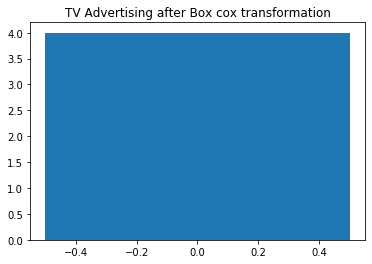

In [28]:
plt.hist(df_clean['TV Advertising'], bins='auto')  # arguments are passed to np.histogram
plt.title("TV Advertising after Box cox transformation")
plt.show()

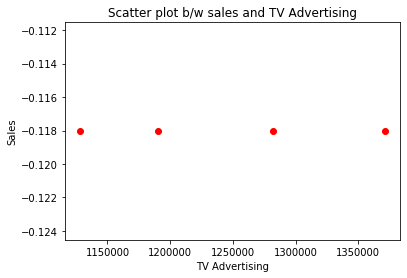

In [34]:
plt.plot(df_clean['Sales'], df_clean['TV Advertising'], 'ro')  # arguments are passed to np.histogram
plt.title("Scatter plot b/w sales and TV Advertising")
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.show()

In [0]:
import os
import sys
from patsy import PatsyError
import collections


In [70]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula=" Sales ~ TV Advertising +Direct Marketing+Print Advertisting+Internet Advertising", data=df_clean).fit()
model2 = sm.ols(formula="Sales ~ TV Advertising+Direct Marketing+Print Advertisting", data=df_clean).fit()
model3 = sm.ols(formula="Sales ~ TV  Advertising+Direct Marketing", data=df_clean).fit()
model4 = sm.ols(formula="Sales ~ TV Advertising", data=df_clean).fit()
#sales~TV+radio+newspaper
print(model1.summary())
print(model2.summary())
print(model3.summary())
print(model4.summary())

SyntaxError: ignored